# Worksheet 6

In this week's lab class you will gain experience with applying some Bayesian techniques in practice. There will be a quiz based on the worksheet, which you should complete first. The quiz is worth 5% of the assessment of the unit.

## Bayesian regression

We are going to fit a polynomial to a one-dimensional problem and explore its properties. First we import some useful packages. 

In [2]:
import numpy as np
import sklearn as sk
import numpy.linalg as la

import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge, LinearRegression

We next define a utility function that will create a non-linear function `f` of a vector `x` with noise added with standard deviation `noise_amount`.

In [3]:
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise

Now we define a function to plot results that we will use a lot in the following experiments. The two arguments it takes are a (fitted) Bayesian ridge regression model and a (fitted) ordinary regression model, the degree of the model and the number of training points.

In [4]:
def plot_results(clf, ols, degree, num_training_points):
    lw = 2
    plt.figure(figsize=(6, 5))
    plt.title("Weights of the model with n="+ str(num_training_points))
    plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
             label="Bayesian Ridge estimate")
    #plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
    plt.plot(ols.coef_, color='navy', linestyle='--', label="Linear regression estimate")
    plt.xlabel("Features")
    plt.ylabel("Values of the weights")
    plt.legend(loc="best", prop=dict(size=12))
    
    X_plot = np.linspace(0, 11, 30)
    y_plot = f(X_plot, noise_amount=0)
    y_mean, y_std = clf.predict(np.vander(X_plot, degree), return_std=True)
    y2_mean = ols.predict(np.vander(X_plot, degree))
    plt.figure(figsize=(6, 5))
    plt.errorbar(X_plot, y_mean, y_std, color='navy',
                 label="Polynomial Bayesian Ridge Regression", linewidth=lw)
    plt.plot(X_plot, y2_mean,  color='red', label='Linear Regression',
             linestyle='--', linewidth=lw)
    plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
             label="Ground Truth")
    plt.ylabel("Output y")
    plt.xlabel("Feature X")
    plt.legend(loc="best")
    plt.show()

To see what the data generating function looks like, set the random seed, generate 100 equally spaced points (use np.linspace) in the range $(1, 10)$, and plot `f(x)` against `x` with `noise_amount=0.1`.

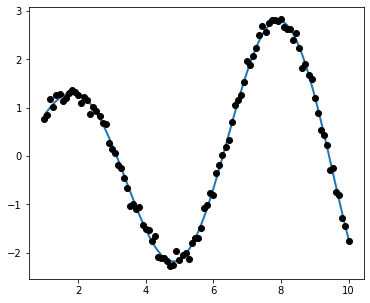

In [5]:
#TODO block 1
np.random.seed(1729)
# Generate 100 equally spaced points
X = np.linspace(1, 10, 100)
# Set output noise standard deviation to 0.1 and generate target values
y = f(X, noise_amount=0.1)
# True function has no noise
true_y=f(X, noise_amount=0.0)

# Plot both sets of data on a single graph: the sample as dots and the underlying function as a line.
plt.figure(figsize=(6,5))
plt.plot(X, true_y, linewidth=2)
plt.plot(X, y, 'ok');

We are now going to fit polynomials using linear regression to various datasets generated with this function. To create the input functions, we will use the numpy function vander: API available [here](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) 

This function generates polynomial basis function values from a row vector. Use it to create a matrix up to third order for the vector $(1, 2, 3)$ and print the result.

In [6]:
#TODO block 2
v = np.vander(np.array([1, 2, 3]))
print(str(v));

[[1 1 1]
 [4 2 1]
 [9 3 1]]


At this point it is worth reading the sklearn documentation about Bayesian ridge regression which can be found [here](https://scikit-learn.org/stable/modules/linear_model.html#bayesian-ridge-regression) (and the earlier part of Section 1.1.10). The parameter $\alpha$ is the precision (inverse variance) of the noise model (what we called $\beta$ in the lectures) while the parameter $\lambda$ is the precision of the weight prior (what we called $\alpha$ in the lectures). 

You should create the Bayesian ridge regression model with `compute_score=True` and fit it with degree equal to 10 to 100 equally spaced points in the range $(1, 10)$ (remember to set the seed to 1729 first) and noise standard deviation $0.1$. The input values should be generated using the vander function at the data points.

Do the same for a linear regression model and then call `plot_results`

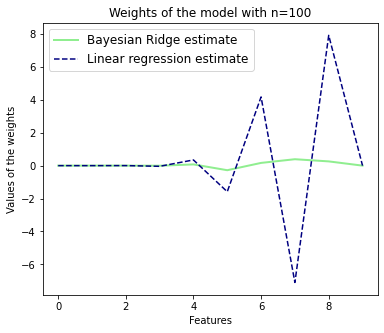

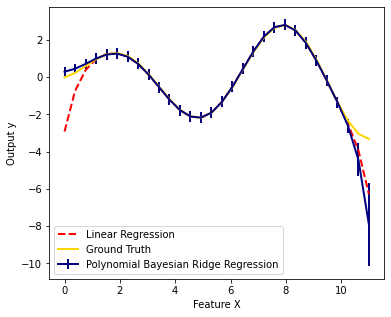

In [7]:
#TODO block 3

# Use degree and num_training_points as variables to make it easier to modify them for systematic experiments later
degree = 10

num_training_points = 100
np.random.seed(1729)
X = np.linspace(1, 10, num_training_points)
y = f(X, noise_amount=0.1)

# Fit Bayesian ridge regression model with polynomial input values (which we must compute explicitly)
clf_poly = BayesianRidge(compute_score=True)
clf_poly.fit(np.vander(X, degree), y)


# Do the same for linear regression, again with the same polynomial inputs
ols = LinearRegression()
ols.fit(np.vander(X, degree), y)

plot_results(clf_poly, ols, degree, num_training_points) 

Here are the first ![First graph](graph1.png) and second graphs ![Second graph](graph2.png)

If you have got that right, you are ready to carry out your first experiment. Let the number of points in the training set
vary in the selection $(8, 9, 10, 11, 12, 20, 40, 100)$ and repeat the fitting process above for each of these training
sets (reset the random seed on each iteration). Print out the final fitted value of `alpha` in the Bayesian ridge 
regression model at each iteration of this process. Compare it to what the true value is.

Look at all the graphs you generate and the values of weights and parameters. Write down your analysis of these results - you will need this for the quiz.

Estimated value of alpha 3.7641422921988488


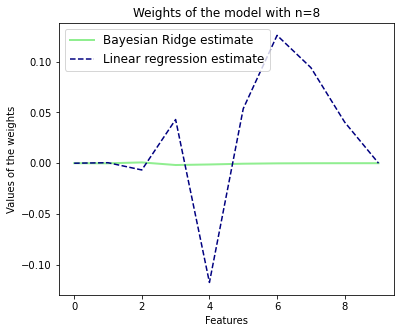

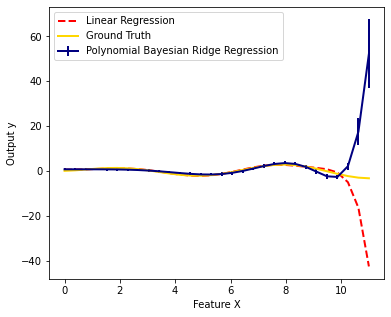

Estimated value of alpha 2.611047484622283


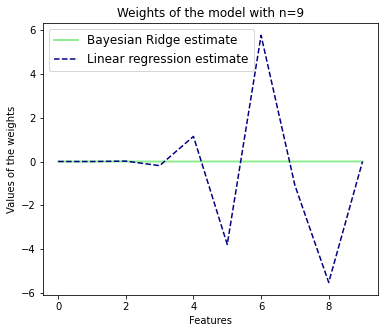

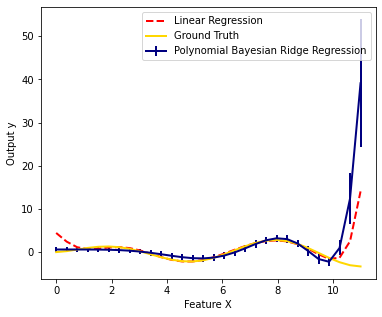

Estimated value of alpha 2.638117838515664


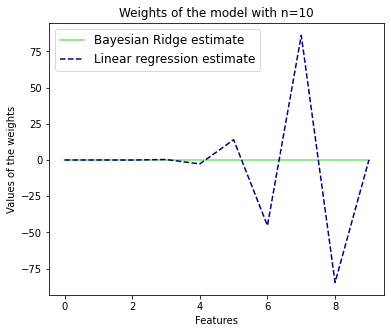

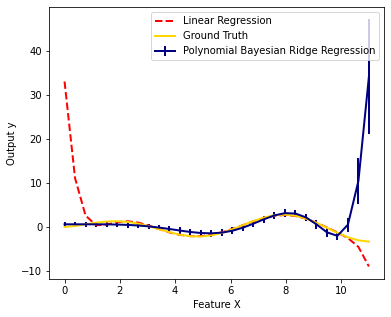

Estimated value of alpha 2.851358798717292


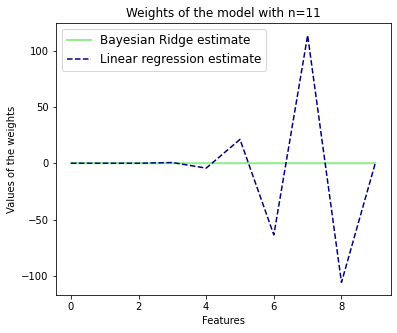

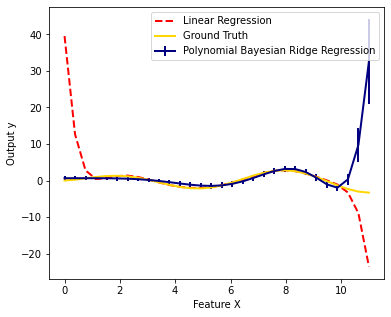

Estimated value of alpha 2.9522597275505262


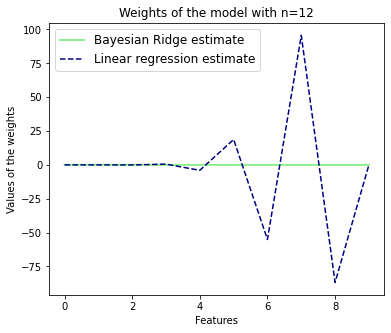

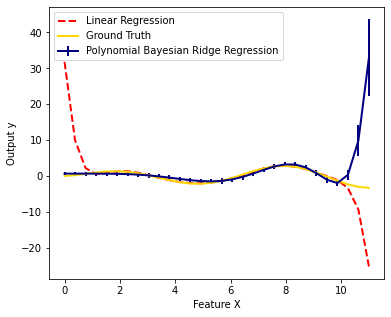

Estimated value of alpha 13.978269802188851


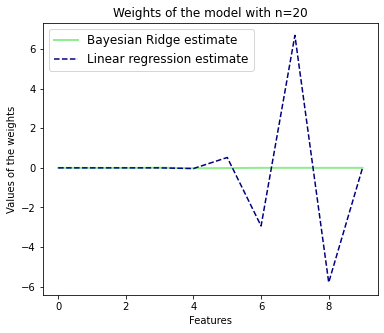

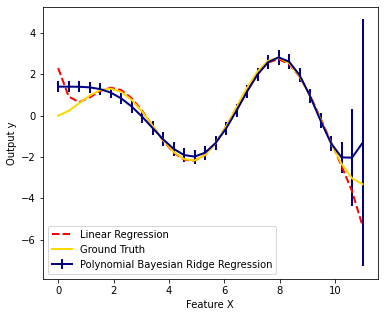

Estimated value of alpha 103.04481333949167


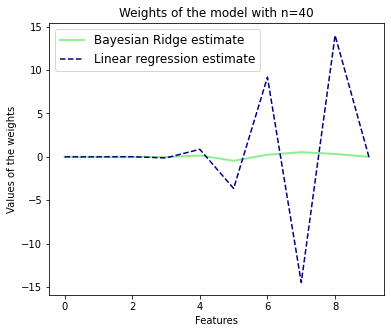

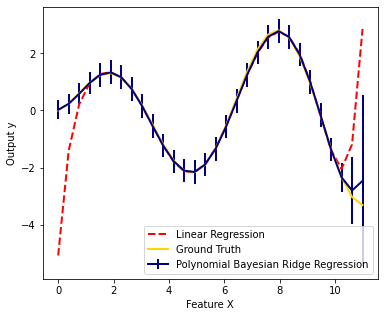

Estimated value of alpha 93.33931480889063


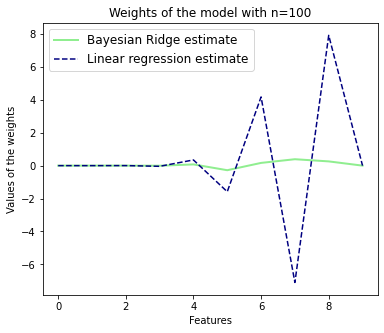

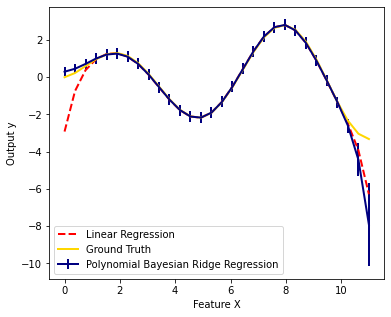

In [7]:
#TODO block 4

# Now use the variables as a means of running multiple experiments
# Not modifying degree for now, but could easily add a loop around different polynomial degrees
degree = 10
ntrain = (8, 9, 10, 11, 12, 20, 40, 100)
for num_training_points in ntrain :
    
    # Set the seed!
    np.random.seed(1729)
    X = np.linspace(1, 10, num_training_points)
    y = f(X, noise_amount=0.1)
    clf_poly = BayesianRidge(compute_score=True)
    clf_poly.fit(np.vander(X, degree), y)
    print('Estimated value of alpha ' + str(clf_poly.alpha_))
    
    ols = LinearRegression()
    ols.fit(np.vander(X, degree), y)
    plot_results(clf_poly, ols, degree, num_training_points) 

The true value of the noise standard deviation is $0.1$, so the true value of the noise variance is $0.01$. Hence the optimal value of $\alpha$ is $100$. We see that the value of $\alpha$ converges to close to the right value as the number of data points increases. It starts off much too small.

Considering the graphs of the weights, we note that the Bayesian ridge regression weights are nearly always smaller in magnitude than the linear regression weights. This makes sense since they are regularised. We also note that the Bayesian weights are all very close to zero when the training dataset is small, but gradually become bigger with more data as there is more evidence.

Considering the function plots, we see that both the models fit the data quite well in the training data range $(1, 10)$ but generalise less well outside that range. The error bars on the Bayesian ridge regression plot get larger outside of the training data, thus showing that the model is less certain of its predictions in those ranges. We note that linear regression generalises significantly worse than Bayesian ridge regression when the number of data points is less than 10.

Now repeat the experiment above but with the `noise_amount` parameter set to 1.0 instead of 0.1. Again, note the values of
`alpha` and analyse the graphs.

Estimated value of alpha 0.7849130133292087


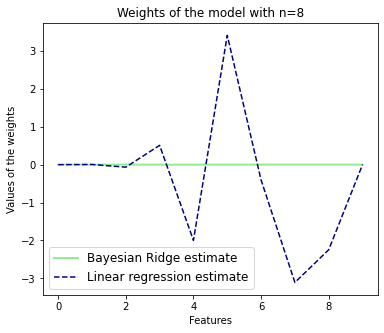

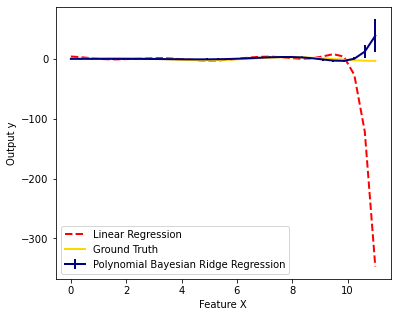

Estimated value of alpha 0.6451281268267176


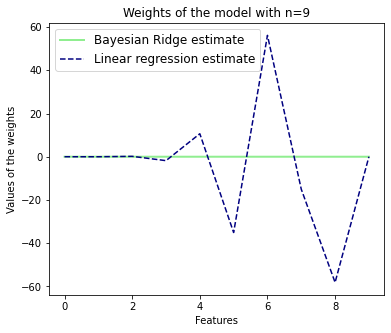

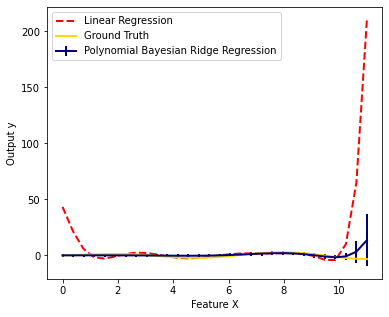

Estimated value of alpha 0.8607445047769949


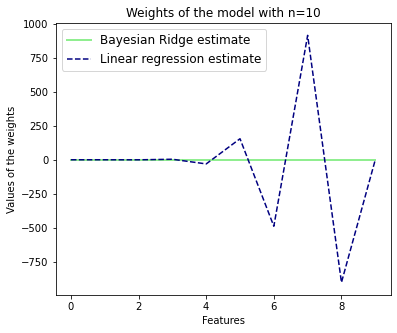

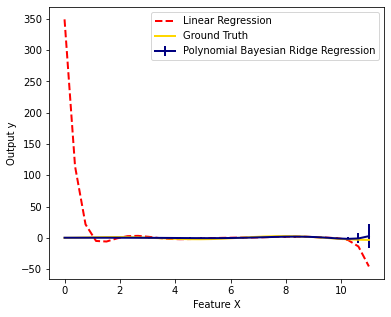

Estimated value of alpha 1.1308270724872764


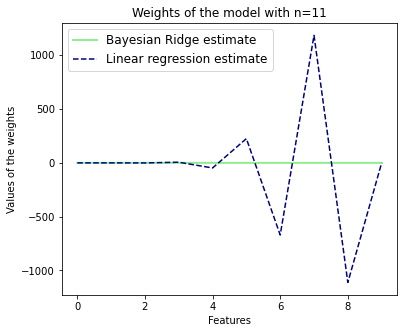

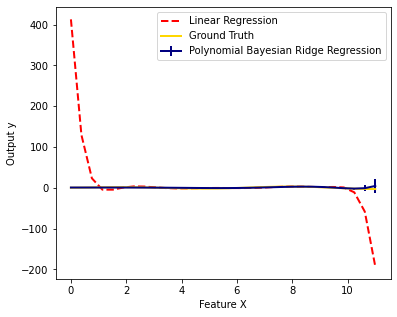

Estimated value of alpha 1.2918640835149187


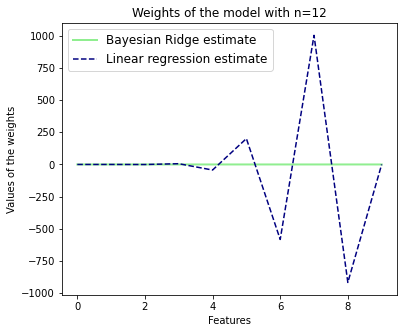

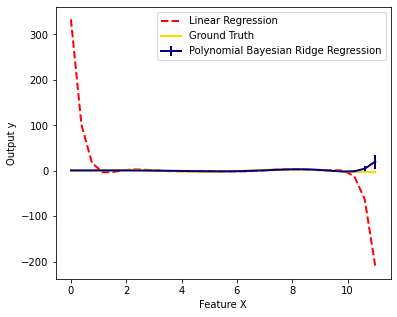

Estimated value of alpha 0.6907699065333082


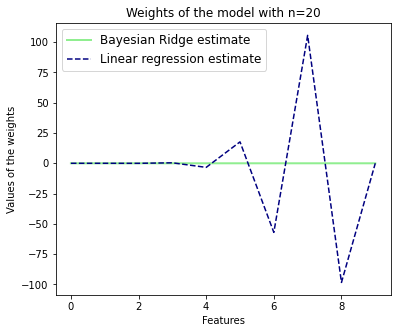

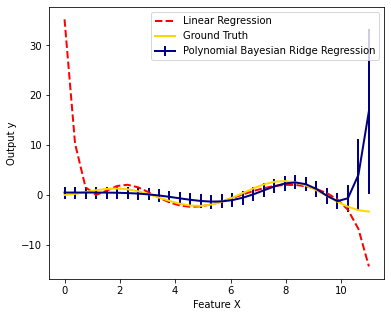

Estimated value of alpha 0.7639743885686199


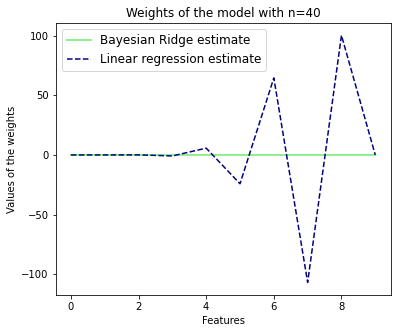

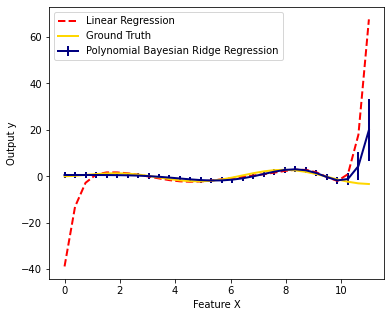

Estimated value of alpha 0.9418123776850686


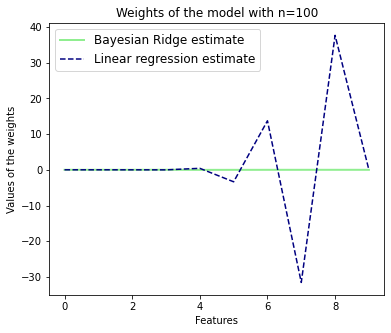

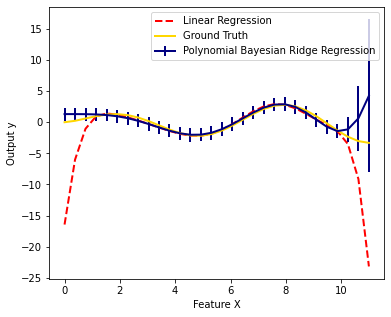

In [8]:
#TODO block 5

degree = 10
ntrain = (8, 9, 10, 11, 12, 20, 40, 100)
for num_training_points in ntrain :
    np.random.seed(1729)
    X = np.linspace(1, 10, num_training_points)
    y = f(X, noise_amount=1.0)
    clf_poly = BayesianRidge(compute_score=True)
    clf_poly.fit(np.vander(X, degree), y)
    print('Estimated value of alpha ' + str(clf_poly.alpha_))
    
    ols = LinearRegression()
    ols.fit(np.vander(X, degree), y)
    plot_results(clf_poly, ols, degree, num_training_points) 

This time the value of `alpha` should be 1, and again, we see the values converge to be approximately 1 as the number of training data points increases.

The difference in generalisation performance between the two models is greater even for larger training data set sizes in this case.

## Evidence procedure for PCA
In this section we are going to do some experiments to compare the evidence procedure for PCA with cross-validation and also with a related model called Factor Analysis. First we import some relevant packages.

In [9]:
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.model_selection import cross_val_score
import time

Next we create some synthetic data. There are 1000 data points in 50-dimensional space and the data has rank 10. We achieve this by using singular value decomposition to create a lower rank basis. The homogeneous noise data `X_hom` has the same variance in each dimension while the heterogeneous noise data `X_het` has randomly varying variance in each dimension.

In [10]:
# Create the data
n_samples, n_features, rank = 1000, 50, 10
sigma = 1.
rng = np.random.RandomState(42)
U, _, _ = la.svd(rng.randn(n_features, n_features))
X = np.dot(rng.randn(n_samples, rank), U[:, :rank].T)

# Adding homoscedastic noise
X_hom = X + sigma * rng.randn(n_samples, n_features)

# Adding heteroscedastic noise
sigmas = sigma * rng.rand(n_features) + sigma / 2.
X_het = X + rng.randn(n_samples, n_features) * sigmas

The following function `compute_scores` takes a dimensionality reduction model and uses cross-validation to 
compute the log likelihood of it when
fitted to a dataset a range of numbers of components using the `sklearn` function `cross_val_score`: information
    [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). It does this
    by fitting the model and applying 5-fold cross-validation (the default).

In [11]:
n_components = np.arange(0, n_features, 1)  # options for n_components

def compute_scores(X, model):
    
    scores = []
    for n in n_components:
        model.n_components = n
        scores.append(np.mean(cross_val_score(model, X)))
    return scores

The next task is to compare PCA with the evidence procedure with PCA using cross-validation and factor analysis using cross-validation. Factor analysis is very similar to probabilistic PCA but the noise model is diagonal instead of spherical (also
known as *isotropic*): see [API](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html).

You should create a PCA model with the full SVD solver and a Factor Analysis model. Fit and score them (using `compute_scores`) for all numbers of components from 1 to 50 and store the result in a variable `pca_scores` and `fa_scores` respectively. Measure how long `compute_scores` takes for each model and print the results.

Then fit a single PCA using mle (which ensures that the evidence procedure is used). Time this as well and print the result.

Do this for the homogeneous data `X_hom`. The code may take 1-2 minutes to run. Review the graph and timings and analyse what they tell you.

Time for PCA cross-validation is 0.6853857040405273
Time for Factor Analysis is 19.39903712272644
Time for PCA evidence procedure is 0.05585598945617676
best n_components by PCA CV = 10
best n_components by FactorAnalysis CV = 11
best n_components by PCA MLE = 10


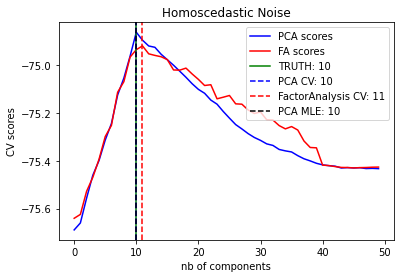

In [12]:

X = X_hom
title = 'Homoscedastic Noise'

#TODO block 6

# Fit standard PCA with cross-validation
pcaCV = PCA(svd_solver='full')
time_start = time.time()
pca_scores = compute_scores(X, pcaCV)
print('Time for PCA cross-validation is ' + str(time.time() - time_start))

# Fit standard factor analysis with cross-validation
faCV = FactorAnalysis()
time.start = time.time()
fa_scores = compute_scores(X, faCV)
print('Time for Factor Analysis is ' + str(time.time() - time_start))

n_components_pca = n_components[np.argmax(pca_scores)]
n_components_fa = n_components[np.argmax(fa_scores)]

# Fit PCA using evidence procedure
pca = PCA(svd_solver='full', n_components='mle')
time_start = time.time()
pca.fit(X)
print('Time for PCA evidence procedure is ' + str(time.time() - time_start))
n_components_pca_mle = pca.n_components_

# Identify best version of each model
print("best n_components by PCA CV = %d" % n_components_pca)
print("best n_components by FactorAnalysis CV = %d" % n_components_fa)
print("best n_components by PCA MLE = %d" % n_components_pca_mle)

plt.figure()
plt.plot(n_components, pca_scores, 'b', label='PCA scores')
plt.plot(n_components, fa_scores, 'r', label='FA scores')
plt.axvline(rank, color='g', label='TRUTH: %d' % rank, linestyle='-')
plt.axvline(n_components_pca, color='b',
            label='PCA CV: %d' % n_components_pca, linestyle='--')
plt.axvline(n_components_fa, color='r',
            label='FactorAnalysis CV: %d' % n_components_fa,
            linestyle='--')
plt.axvline(n_components_pca_mle, color='k',
            label='PCA MLE: %d' % n_components_pca_mle, linestyle='--')


plt.xlabel('nb of components')
plt.ylabel('CV scores')
plt.legend(loc='best')
plt.title(title);

The graph shows that both versions of PCA find the same, optimal, number of components, which is 10. Also the score of PCA is
higher than that of factor analysis. In addition, factor analysis finds a peak at 11 components. 

In terms of timing, the evidence procedure is about 5 times faster than cross-validation, which in turn is about 30 times 
faster than factor analysis with cross-validation.

Now carry out the same experiment for the heterogeneous dataset `X_het` and analyse the results.

Time for PCA cross-validation is 0.7978031635284424
Time for Factor Analysis is 16.465962886810303
Time for PCA evidence procedure is 0.06147432327270508
best n_components by PCA CV = 38
best n_components by FactorAnalysis CV = 10
best n_components by PCA MLE = 38


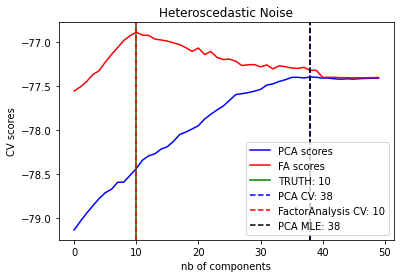

In [13]:


X = X_het
title = 'Heteroscedastic Noise'

#TODO block 7

pcaCV = PCA(svd_solver='full')
time_start = time.time()
pca_scores = compute_scores(X, pcaCV)
print('Time for PCA cross-validation is ' + str(time.time() - time_start))
faCV = FactorAnalysis()
time.start = time.time()
fa_scores = compute_scores(X, faCV)
print('Time for Factor Analysis is ' + str(time.time() - time_start))

n_components_pca = n_components[np.argmax(pca_scores)]
n_components_fa = n_components[np.argmax(fa_scores)]

pca = PCA(svd_solver='full', n_components='mle')
time_start = time.time()
pca.fit(X)
print('Time for PCA evidence procedure is ' + str(time.time() - time_start))
n_components_pca_mle = pca.n_components_

print("best n_components by PCA CV = %d" % n_components_pca)
print("best n_components by FactorAnalysis CV = %d" % n_components_fa)
print("best n_components by PCA MLE = %d" % n_components_pca_mle)

plt.figure()
plt.plot(n_components, pca_scores, 'b', label='PCA scores')
plt.plot(n_components, fa_scores, 'r', label='FA scores')
plt.axvline(rank, color='g', label='TRUTH: %d' % rank, linestyle='-')
plt.axvline(n_components_pca, color='b',
            label='PCA CV: %d' % n_components_pca, linestyle='--')
plt.axvline(n_components_fa, color='r',
            label='FactorAnalysis CV: %d' % n_components_fa,
            linestyle='--')
plt.axvline(n_components_pca_mle, color='k',
            label='PCA MLE: %d' % n_components_pca_mle, linestyle='--')


plt.xlabel('nb of components')
plt.ylabel('CV scores')
plt.legend(loc='best')
plt.title(title);

In this case, we see that both versions of PCA significantly over-estimate the number of components. This is because the isotropic noise model is not a good fit to the data, so more components are needed to model the probability density. Factor analysis gets the right answer, though this is less surprising since the data has essentially been generated from a factor analysis model. 

The relative timing differences are similar.

## Variational Gaussian mixture models
In this section we will see how variational Bayesian methods help us to fit Gaussian mixture models. First we load and normalise the Old Faithful dataset. An overview of the sklearn mixture models can be found [here](https://scikit-learn.org/stable/modules/mixture.html)

In [14]:
import pandas as pd
from sklearn import mixture
from sklearn.preprocessing import StandardScaler
import itertools
import matplotlib as mpl

df = pd.read_excel('OldFaithfulData.xlsx')

Next we create a data matrix and then standardise the data (normalise each variable to zero mean and unit variance). This is often a good pre-processing step to apply if you are fitting non-linear models.

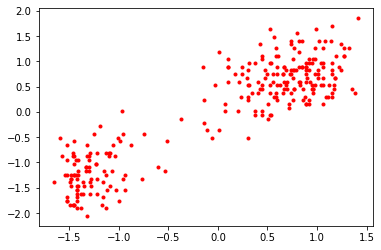

In [15]:
data = df.to_numpy()

scaler = StandardScaler().fit(data)
X = scaler.transform(data)


plt.plot(X[:, 0], X[:, 1], 'r.')
plt.show()

In the next block of code, we create a function that we will use to plot the results of fitting various mixture models. In this function, the first parameter is the data, the second is the predicted label at the data, the third and fourth are the means and covariances extracted from the mixture model. The index should be incremented by one each time it is called since it gives the index of the sub-plot on that iteration. 

In [16]:
color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange', 'green'])

def plot_gmm_results(X, Y_, means, covariances, index, title):
    plt.figure(figsize=(10,8));
    #splot = plt.subplot(5, 1, 1 + index)
    splot, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = la.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / la.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

    plt.xlim(-2., 2.)
    plt.ylim(-2.5, 2.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title);

Now create a Gaussian mixture model (`mixture.GaussianMixture`) with 6 components, full covariance matrices, a random state of 1729 and fit it to the dataset `X`. 

<Figure size 720x576 with 0 Axes>

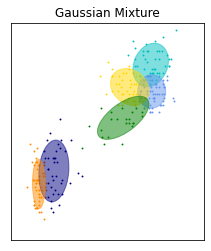

In [17]:
#TODO block 8
gmm = mixture.GaussianMixture(n_components=6, covariance_type='full', random_state=1729).fit(X)
plot_gmm_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')

Now fit a Bayesian GMM (`mixture.BayesianGaussianMixture`) with the same parameters, but also specifying the `weight_concentration_prior_type` to be `'dirichlet_distribution'`. Plot the results (with `index=1`). This is the 
[API](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html#sklearn.mixture.BayesianGaussianMixture)

<Figure size 720x576 with 0 Axes>

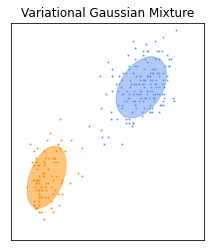

In [18]:
#TODO block 9
vbgmm = mixture.BayesianGaussianMixture(n_components=6,
                                        weight_concentration_prior_type = 'dirichlet_distribution',
                                        covariance_type='full', random_state=1729).fit(X)
plot_gmm_results(X, vbgmm.predict(X), vbgmm.means_, vbgmm.covariances_, 1,
             'Variational Gaussian Mixture')

The default value of the mixing coefficient hyperprior (known as the *weight concentration prior* in this implementation) is 
`1/n_components`. Now carry out the same experiment setting it to $10^{-3}$, $1$, and $1000$. Then review the five graphs (two above and three below) and write down your analysis of them.

C:\Users\in17746\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


<Figure size 720x576 with 0 Axes>

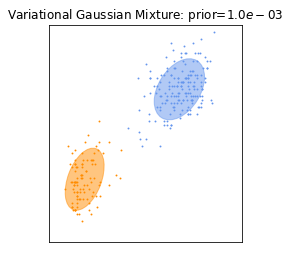

<Figure size 720x576 with 0 Axes>

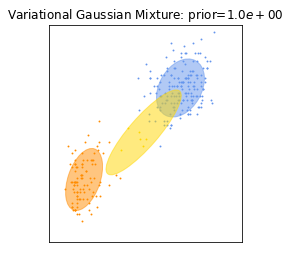

<Figure size 720x576 with 0 Axes>

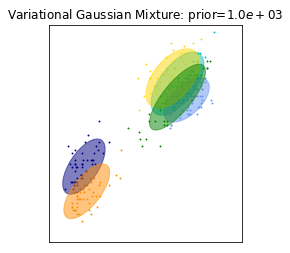

In [19]:
#TODO block 10

vbgmm = mixture.BayesianGaussianMixture(n_components=6,
                                        weight_concentration_prior_type = 'dirichlet_distribution',
                                        weight_concentration_prior=1e-3,
                                        covariance_type='full', random_state=1729).fit(X)
plot_gmm_results(X, vbgmm.predict(X), vbgmm.means_, vbgmm.covariances_, 2,
             r"%s$%.1e$" % ('Variational Gaussian Mixture: prior=', 1e-3))

vbgmm = mixture.BayesianGaussianMixture(n_components=6,
                                        weight_concentration_prior_type = 'dirichlet_distribution',
                                        weight_concentration_prior = 1,
                                        covariance_type='full', random_state=1729).fit(X)
plot_gmm_results(X, vbgmm.predict(X), vbgmm.means_, vbgmm.covariances_, 3,
             r"%s$%.1e$" % ('Variational Gaussian Mixture: prior=', 1))

vbgmm = mixture.BayesianGaussianMixture(n_components=6,
                                        weight_concentration_prior_type = 'dirichlet_distribution',
                                        weight_concentration_prior = 1000,
                                        covariance_type='full', random_state=1729).fit(X)
plot_gmm_results(X, vbgmm.predict(X), vbgmm.means_, vbgmm.covariances_, 4,
             r"%s$%.1e$" % ('Variational Gaussian Mixture: prior=', 1000))

The Gaussian mixture model with 6 components covers the data well, but there are clearly more components than needed to model the probability density. The variational Bayesian GMM fits two components to the data (the other four have negligible mixing coefficients) which matches the results from the lecture.

Setting the weight concentration prior to $10^{-3}$ and $1$ has no obvious effect on the results, but setting it to $1000$ leads to all 6 components being retained in the model. 

Note that there were convergence issues with prior equal to $1$, though the final version of the model looks reasonable. This could be investigated further.